<a href="https://colab.research.google.com/github/badrinarayanan02/deep_learning/blob/main/2348507_DLLab9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **LSTM**

Develop an LSTM model using any dataset, ensuring that all results are displayed in appropriate graphs.

Using twitter dataset to perform sentimental analysis using LSTM

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
import string
import re
import nltk
from keras.models import Sequential
from keras.layers import Embedding, Dense, LSTM
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [8]:
tweetData = pd.read_csv('/content/Tweets - Tweets.csv')
tweetData.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,5.700000e+17,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,24-02-2015 11:35,NaN,Eastern Time (US & Canada)
1,5.700000e+17,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,24-02-2015 11:15,NaN,Pacific Time (US & Canada)
2,5.700000e+17,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,24-02-2015 11:15,Lets Play,Central Time (US & Canada)
3,5.700000e+17,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,24-02-2015 11:15,NaN,Pacific Time (US & Canada)
4,5.700000e+17,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,24-02-2015 11:14,NaN,Pacific Time (US & Canada)


In [9]:
tweetData.shape

(14640, 15)

In [10]:
tweetData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  float64
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

In [11]:
tweetData.isnull().sum()

tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64

**Inference:** There is some null values in the dataset especially in the columns negativereason, negativereason_confidence, airline_sentiment_gold, negativereason_gold, tweet_coord, tweet_location and user_timezone.

Filling the null values with placeholders

In [12]:
tweetData['negativereason'].fillna('No reason', inplace=True)
tweetData['negativereason_confidence'].fillna(0, inplace=True)
tweetData['airline_sentiment_gold'].fillna('No gold', inplace=True)
tweetData['negativereason_gold'].fillna('No gold reason', inplace=True)

In [13]:
tweetData.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,5.700000e+17,neutral,1.0000,No reason,0.0000,Virgin America,No gold,cairdin,No gold reason,0,@VirginAmerica What @dhepburn said.,NaN,24-02-2015 11:35,NaN,Eastern Time (US & Canada)
1,5.700000e+17,positive,0.3486,No reason,0.0000,Virgin America,No gold,jnardino,No gold reason,0,@VirginAmerica plus you've added commercials t...,NaN,24-02-2015 11:15,NaN,Pacific Time (US & Canada)
2,5.700000e+17,neutral,0.6837,No reason,0.0000,Virgin America,No gold,yvonnalynn,No gold reason,0,@VirginAmerica I didn't today... Must mean I n...,NaN,24-02-2015 11:15,Lets Play,Central Time (US & Canada)
3,5.700000e+17,negative,1.0000,Bad Flight,0.7033,Virgin America,No gold,jnardino,No gold reason,0,@VirginAmerica it's really aggressive to blast...,NaN,24-02-2015 11:15,NaN,Pacific Time (US & Canada)
4,5.700000e+17,negative,1.0000,Can't Tell,1.0000,Virgin America,No gold,jnardino,No gold reason,0,@VirginAmerica and it's a really big bad thing...,NaN,24-02-2015 11:14,NaN,Pacific Time (US & Canada)


Dropping Unnecessary Columns

In [14]:
finalDf = tweetData.drop(['tweet_id','tweet_coord', 'tweet_location', 'user_timezone'], axis=1)

**Inference:** Since these columns are very unnecessary for further process, dropping these columns.


In [15]:
finalDf.isnull().sum()

airline_sentiment               0
airline_sentiment_confidence    0
negativereason                  0
negativereason_confidence       0
airline                         0
airline_sentiment_gold          0
name                            0
negativereason_gold             0
retweet_count                   0
text                            0
tweet_created                   0
dtype: int64

**Inference:** Now there is no null values in the dataset.

# **Data Visualization**

Airline Sentiment Distribution

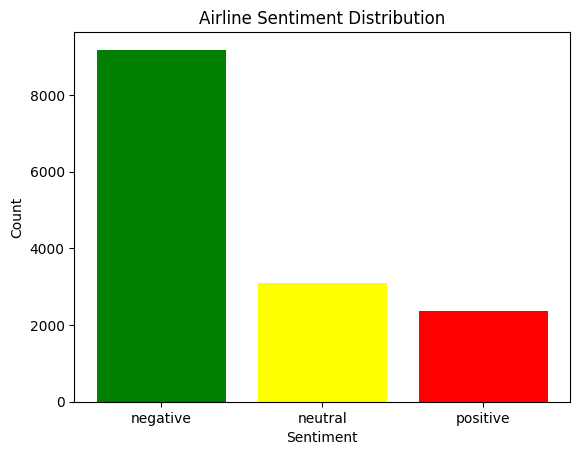

In [16]:
sentiment_counts = finalDf['airline_sentiment'].value_counts()
plt.bar(sentiment_counts.index, sentiment_counts.values, color=['green', 'yellow', 'red'])
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Airline Sentiment Distribution')
plt.show()

**Inference:** This is the visualization of airline sentiment distribution, we can visualize that negative sentiments counts are over than 8000, and neutral sentiment counts are over than 2000, and positive sentiments are slighlty over 2000.

Airline Distribution

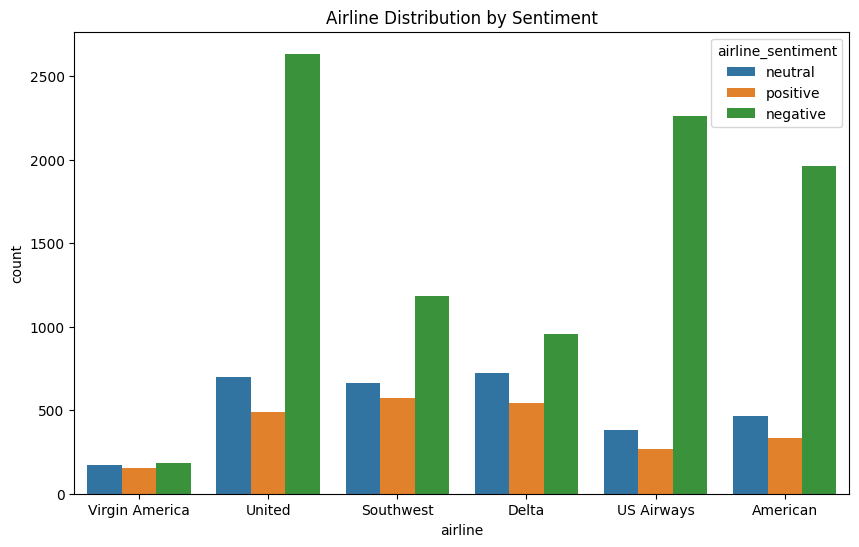

In [17]:
plt.figure(figsize=(10, 6))
sns.countplot(x='airline', data=finalDf, hue='airline_sentiment')
plt.title('Airline Distribution by Sentiment')
plt.show()

**Inference:** This is the visualization of airline distribution by sentiments, we can observe insights like negative sentiments counts are more for United Airlines, Southwest Airways, Delta Airlines, US Airways and American Airlines.

Sentiment Confidence Distribution

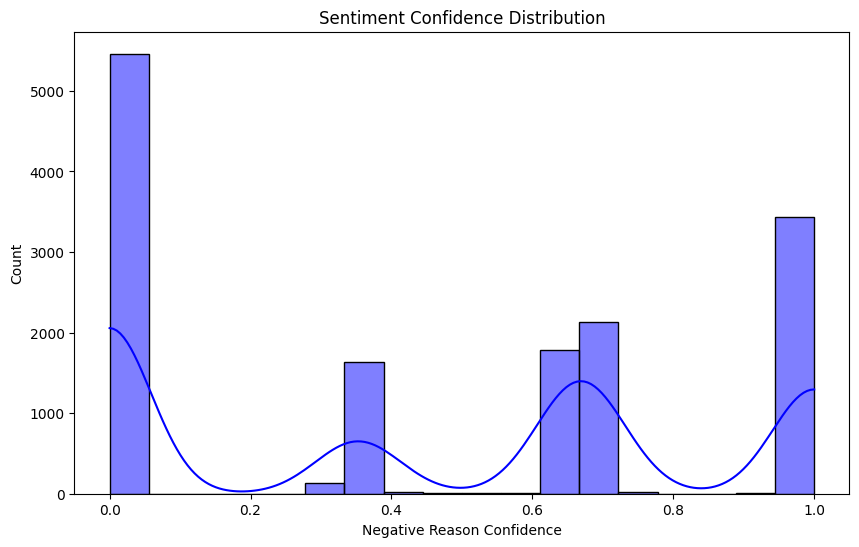

In [18]:
plt.figure(figsize=(10, 6))
sns.histplot(finalDf['negativereason_confidence'], kde=True, color='blue')
plt.xlabel('Negative Reason Confidence')
plt.ylabel('Count')
plt.title('Sentiment Confidence Distribution')
plt.show()

**Inference:** This is the visualization of Sentiment Confidence Distribution, we can observe insights like the count is approximately 3500 for confidence score of 1.0. And approximately the count is 2000 for the confidence score of 0.7.

Text Preprocessing

In [19]:
def preprocess_text(text):

    text = text.lower()

    # Removing url
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)

    # Removing punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))

    # Removing stopwords
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    filtered_text = [word for word in word_tokens if word not in stop_words]

    preprocessed_text = ' '.join(filtered_text)

    return preprocessed_text

finalDf['text'] = finalDf['text'].apply(preprocess_text)

In [20]:
finalDf.head()

,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_created
0,neutral,1.0000,No reason,0.0000,Virgin America,No gold,cairdin,No gold reason,0,virginamerica dhepburn said,24-02-2015 11:35
1,positive,0.3486,No reason,0.0000,Virgin America,No gold,jnardino,No gold reason,0,virginamerica plus youve added commercials exp...,24-02-2015 11:15
2,neutral,0.6837,No reason,0.0000,Virgin America,No gold,yvonnalynn,No gold reason,0,virginamerica didnt today must mean need take ...,24-02-2015 11:15
3,negative,1.0000,Bad Flight,0.7033,Virgin America,No gold,jnardino,No gold reason,0,virginamerica really aggressive blast obnoxiou...,24-02-2015 11:15
4,negative,1.0000,Can't Tell,1.0000,Virgin America,No gold,jnardino,No gold reason,0,virginamerica really big bad thing,24-02-2015 11:14


Model using LSTM Architecture

In [21]:
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(finalDf['text'])
sequences = tokenizer.texts_to_sequences(finalDf['text'])
X = pad_sequences(sequences, maxlen=100)

y = pd.get_dummies(finalDf['airline_sentiment']).values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
model_lstm = Sequential()
model_lstm.add(Embedding(10000, 32))
model_lstm.add(LSTM(32))
model_lstm.add(Dense(3, activation='softmax'))

model_lstm.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc'])

lstmModel = model_lstm.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10
366/366 [==============================] - 11s 26ms/step - loss: 0.7515 - acc: 0.6849 - val_loss: 0.5947 - val_acc: 0.7486
Epoch 2/10
366/366 [==============================] - 8s 22ms/step - loss: 0.5486 - acc: 0.7814 - val_loss: 0.5501 - val_acc: 0.7773
Epoch 3/10
366/366 [==============================] - 9s 24ms/step - loss: 0.4658 - acc: 0.8191 - val_loss: 0.5193 - val_acc: 0.7913
Epoch 4/10
366/366 [==============================] - 9s 25ms/step - loss: 0.4147 - acc: 0.8413 - val_loss: 0.5036 - val_acc: 0.8029
Epoch 5/10
366/366 [==============================] - 8s 23ms/step - loss: 0.3794 - acc: 0.8583 - val_loss: 0.5099 - val_acc: 0.7995
Epoch 6/10
366/366 [==============================] - 8s 21ms/step - loss: 0.3504 - acc: 0.8696 - val_loss: 0.5158 - val_acc: 0.8077
Epoch 7/10
366/366 [==============================] - 8s 23ms/step - loss: 0.3288 - acc: 0.8782 - val_loss: 0.5239 - val_acc: 0.7934
Epoch 8/10
366/366 [==============================] - 8s 23ms/step -

Evaluating LSTM Model

In [23]:
loss_lstm, accuracy_lstm = model_lstm.evaluate(X_test, y_test)
print(f'LSTM Model - Loss: {loss_lstm}, Accuracy: {accuracy_lstm}')

92/92 [==============================] - 1s 7ms/step - loss: 0.5633 - acc: 0.7971
LSTM Model - Loss: 0.5633381605148315, Accuracy: 0.7971311211585999


**Inference**

The Accuracy is almost around 79% for validation set and a loss of 0.56%

The model demonstrates a consistent decrease in loss and an increase in accuracy during training, that is a positive sign.

The validation set's accuracy is notably close to the training set, it suggests a good generalization capability.

Visualizing training and validation loss

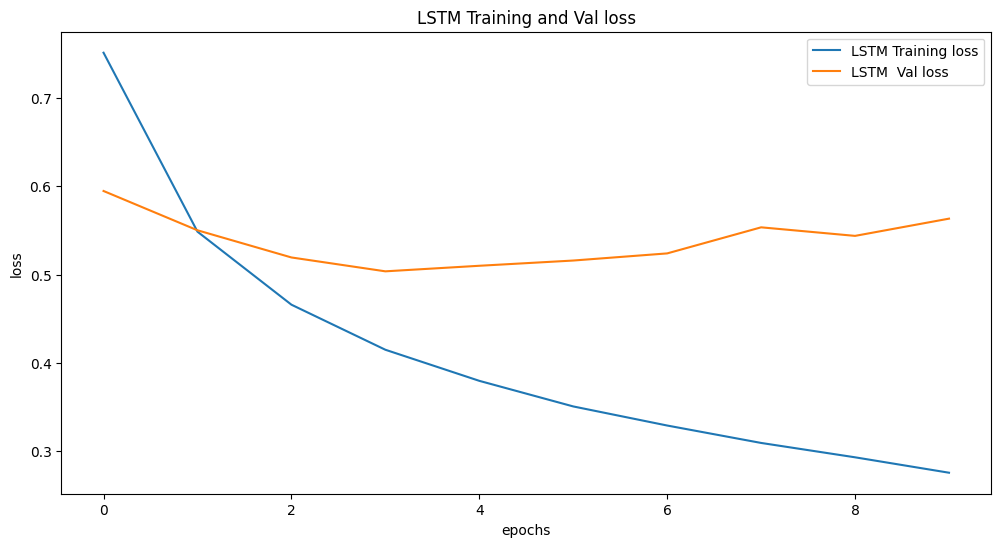

In [28]:
plt.figure(figsize=(12,6))
plt.plot(lstmModel.history['loss'],label='LSTM Training loss')
plt.plot(lstmModel.history['val_loss'],label='LSTM  Val loss')
plt.title('LSTM Training and Val loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

**Inference**

This visualization shows that the loss is getting decreased after each and every epoch.

# **Conclusion**

According to this tweets dataset the LSTM model is performing good with a accuracy of 79%. Thus the task to implement LSTM has been executed successfully.